In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading train data
train_data=pd.read_parquet("/content/train.parquet")

In [4]:
# taking users who are all taking target drug
target_data = train_data[train_data['Incident'] == 'TARGET DRUG']

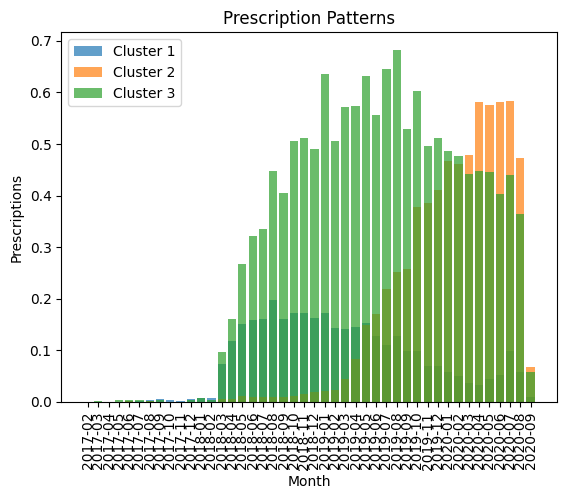

In [5]:
# Step 1: Extract prescription patterns
target_data['Date'] = pd.to_datetime(target_data['Date'])
target_data['Month'] = target_data['Date'].dt.to_period('M').astype(str)  # Convert to string
prescription_patterns = target_data.groupby(['Patient-Uid', 'Month']).size().reset_index(name='Prescriptions')

# Step 2: Prepare data for clustering
pivot_prescription_patterns = prescription_patterns.pivot(index='Patient-Uid', columns='Month', values='Prescriptions').fillna(0)

# Step 3: Apply clustering (for example, KMeans)
from sklearn.cluster import KMeans

num_clusters = 3  # You can adjust this based on your dataset
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(pivot_prescription_patterns)
cluster_labels = kmeans.labels_

# Step 4: Visualize prescription patterns
import matplotlib.pyplot as plt

# Assuming each column represents a month
months = pivot_prescription_patterns.columns
for i in range(num_clusters):
    cluster_data = pivot_prescription_patterns[cluster_labels == i]
    cluster_mean = cluster_data.mean()
    plt.bar(months, cluster_mean, label=f'Cluster {i+1}', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Prescriptions')
plt.title('Prescription Patterns')

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.legend()
plt.show()







In [7]:
import numpy as np

# Calculate summary statistics for each cluster
for i in range(num_clusters):
    cluster_data = pivot_prescription_patterns[cluster_labels == i]
    cluster_mean = cluster_data.mean()
    cluster_std = cluster_data.std()
    cluster_min = cluster_data.min()
    cluster_max = cluster_data.max()
    cluster_median = cluster_data.median()

    print(f"\nCluster {i+1} Summary Statistics:")
    print(f"  Mean Prescriptions: {cluster_mean.mean()}")
    print(f"  Standard Deviation: {cluster_std.mean()}")
    print(f"  Minimum Prescriptions: {cluster_min.min()}")
    print(f"  Maximum Prescriptions: {cluster_max.max()}")
    print(f"  Median Prescriptions: {cluster_median.median()}")

# Description
print("\nDescription:")
print("The bar chart displays the average prescription patterns for each cluster over different months. Each cluster represents a different prescription behavior pattern.")



Cluster 1 Summary Statistics:
  Mean Prescriptions: 0.07864939719778428
  Standard Deviation: 0.2643245429547915
  Minimum Prescriptions: 0.0
  Maximum Prescriptions: 21.0
  Median Prescriptions: 0.0

Cluster 2 Summary Statistics:
  Mean Prescriptions: 0.15392302421196893
  Standard Deviation: 0.2655233385868498
  Minimum Prescriptions: 0.0
  Maximum Prescriptions: 12.0
  Median Prescriptions: 0.0

Cluster 3 Summary Statistics:
  Mean Prescriptions: 0.31978387199490527
  Standard Deviation: 0.46854728117538086
  Minimum Prescriptions: 0.0
  Maximum Prescriptions: 18.0
  Median Prescriptions: 0.0

Description:
The bar chart displays the average prescription patterns for each cluster over different months. Each cluster represents a different prescription behavior pattern.


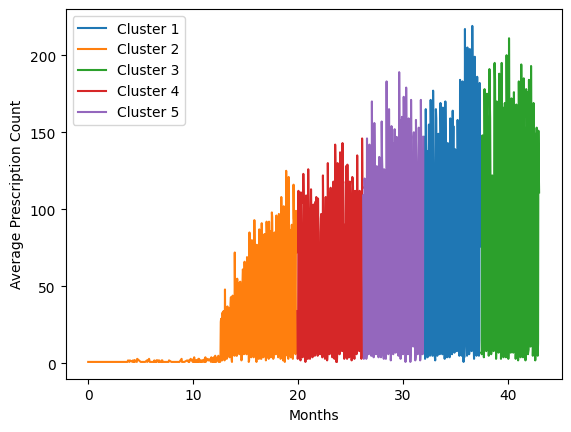

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
target_drug_data = train_data[train_data['Incident'] == 'TARGET DRUG'].copy()  # Make a copy to avoid warnings
target_drug_data['Date'] = pd.to_datetime(target_drug_data['Date'])

# Step 2: Feature Engineering
target_drug_data['Months_since_first_prescription'] = (target_drug_data['Date'] - target_drug_data['Date'].min()) / pd.Timedelta('30D')

# Step 3: Clustering
X = target_drug_data[['Months_since_first_prescription']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)  # Adjust the number of clusters as needed

# Add cluster labels to the data
target_drug_data.loc[:, 'Cluster'] = kmeans.labels_

# Step 4: Visualizing Prescription Patterns
for cluster in range(5):  # Adjust according to the number of clusters
    cluster_data = target_drug_data[target_drug_data['Cluster'] == cluster]
    prescription_counts = cluster_data.groupby('Months_since_first_prescription').size().reset_index(name='Prescription_Count')

    plt.plot(prescription_counts['Months_since_first_prescription'], prescription_counts['Prescription_Count'], label=f'Cluster {cluster+1}')

plt.xlabel('Months')
plt.ylabel('Average Prescription Count')
plt.legend()
plt.show()
